<center><h1>Data Exploratory For Customers Services</h1></center>
For more information, visit my Portfolio at <a href="https://www.novypro.com/profile_projects/mohammed-dolib/">Mohammed Dolib</a> For dashBoard & reports. Git Hub <a href="https://github.com/mdolib">Mohammed Dolib</a>.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('AAMCSC.xlsx', sheet_name='dataset')

### Data understanding
- Dataframe shape
- head and tail
- dtypes
- describe and info

In [3]:
df.shape

(270162, 11)

In [4]:
df.head(2)

,Application ID,system,employee(created by),service,center,CS-staff,CS-staff - center,initiation date,CS-Services,IN Target,service with target!
0,2021/1623,ELMS,منصور راشد الكلباني,تسجيل الرهن,Center,No,No,2021-01-01,Yes,NaN,x
1,2021/1884,ELMS,سيف غدير حمد عبيد الدرعي,إنشاء ملف شخص,South,سيف غدير حمد عبيد الدرعي,South,2021-01-01,Yes,NaN,NaN


In [5]:
df.tail(2)

,Application ID,system,employee(created by),service,center,CS-staff,CS-staff - center,initiation date,CS-Services,IN Target,service with target!
270160,QS13614,Qsystem,نوره سعيد راشد سعيد الظاهرى,تسجيل عقد إيجار - جديد,Center,نوره سعيد راشد سعيد الظاهرى,Center,2021-10-28,No,0.0,NaN
270161,QS13615,Qsystem,فاطمه سعيد محمد المزروعى,تخصيص مساكن شعبية,Center,فاطمه سعيد محمد المزروعى,Center,2021-10-28,No,0.0,NaN


In [6]:
df.dtypes

Application ID                  object
system                          object
employee(created by)            object
service                         object
 center                         object
CS-staff                        object
CS-staff - center               object
initiation date         datetime64[ns]
CS-Services                     object
IN Target                      float64
service with target!            object
dtype: object

In [7]:
df.describe()

,IN Target
count,13615.000000
mean,0.508924
std,0.499939
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270162 entries, 0 to 270161
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Application ID        270162 non-null  object        
 1   system                270162 non-null  object        
 2   employee(created by)  270162 non-null  object        
 3   service               270162 non-null  object        
 4    center               270162 non-null  object        
 5   CS-staff              270162 non-null  object        
 6   CS-staff - center     270162 non-null  object        
 7   initiation date       270162 non-null  datetime64[ns]
 8   CS-Services           270162 non-null  object        
 9   IN Target             13615 non-null   float64       
 10  service with target!  65398 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 22.7+ MB


In [9]:
df.columns

Index(['Application ID', 'system', 'employee(created by)', 'service',
       ' center', 'CS-staff', 'CS-staff - center', 'initiation date',
       'CS-Services', 'IN Target', 'service with target!'],
      dtype='object')

### Data Perperation
- Identifying duplicated columns
- Identifying unique
- Find null values 
- Renaming Columns
- Feature Creation
- Drop irrelevent columns and rows (subset dataset)

#### Rename Columns:

In [10]:
#[column.replace(' ','_') for column in df.columns]
# Rename columns some of them has spaces and not in the same camle case 
Colmuns_name = ['App_ID', 'System', 'Employee', 'Service',
       'Center', 'Cs_staff', 'CS_staff_center', 'Initiation_date',
       'Cs_services', 'In_target', 'Service_with_target']
df.set_axis(Colmuns_name,axis=1,inplace=True)

#### Check for duplicate in dateset:

In [11]:
# Checking for any duplicate in dataset 
df.duplicated().sum()

0

In [12]:
# Looking for subset of data set and checking for duplicate result show 18 records is it, need 
df.duplicated(subset='App_ID').sum() 
#df.loc[df.duplicated(subset='App_ID', keep=False)]
#df.query('App_ID == "202101283940"')

18

In [13]:
df.duplicated(subset=['App_ID','Employee','Initiation_date']).sum()

0

#### Empty Values or Nan:

In [14]:
df.isnull().sum()
# This two colmuns with high number of empty vlaues no use of it can be excluded from dateset
# In_target               256547
# Service_with_target!    204764

App_ID                      0
System                      0
Employee                    0
Service                     0
Center                      0
Cs_staff                    0
CS_staff_center             0
Initiation_date             0
Cs_services                 0
In_target              256547
Service_with_target    204764
dtype: int64

In [15]:
df = df.drop(['In_target','Service_with_target'], axis=1).copy()

In [16]:
df.sample()

,App_ID,System,Employee,Service,Center,Cs_staff,CS_staff_center,Initiation_date,Cs_services
83809,5656729,Tawtheeq-counter,منصور بخيت الشامسي - خدمة عملاء,تجديد إتفاقية إدارة العقارات,Center,No,No,2021-03-29,Yes


In [17]:
df['Center'].unique()

array(['Center', 'South', 'North', 'lands', 'East', 'West', 'unknown',
       'No Center', 0], dtype=object)

In [18]:
df['Center'].value_counts()
# 'Center', 'South', 'North', 'East', 'West'
# Interested on this five CSC Center

Center       201693
0             36085
North         14635
South          6300
West           6091
East           3932
lands          1247
unknown         150
No Center        29
Name: Center, dtype: int64

In [19]:
df = df[df['Center'].isin(['Center', 'South', 'North', 'East', 'West'])].copy()

#### Date Time:

In [20]:
df['Initiation_date'].dtype

dtype('<M8[ns]')

In [21]:
# extracting Feature from Initiation_date columns 
##########################################################
def month_to_quarter(month):
    if month in [1,2,3]:
        return 'Q1'
    elif month in [4,5,6]:
        return 'Q2'
    elif month in [7,8,9]:
        return 'Q3'
    else:
        return 'Q4'
##########################################################
df['quarter'] = df['Initiation_date'].dt.quarter
df['Year'] = df['Initiation_date'].dt.year
df['Month_name'] = df['Initiation_date'].dt.month_name()
df['Month_no'] = df['Initiation_date'].dt.month
df['Day_name'] = df['Initiation_date'].dt.day_name()
df['Day_no'] = df['Initiation_date'].dt.day
df['Quarter_name'] = df['Month_no'].apply(month_to_quarter)

In [22]:
# Subset dataset to selected CS services and centers
df = df[df['CS_staff_center'].isin(['Center', 'South', 'North', 'East', 'West']) & \
(df['Cs_services'] == 'Yes')].reset_index(drop=True).copy()
# final dataset 

In [23]:
df.shape
# New Dataset shape

(42278, 16)

In [24]:
df.isnull().sum()

App_ID             0
System             0
Employee           0
Service            0
Center             0
Cs_staff           0
CS_staff_center    0
Initiation_date    0
Cs_services        0
quarter            0
Year               0
Month_name         0
Month_no           0
Day_name           0
Day_no             0
Quarter_name       0
dtype: int64

In [25]:
df.describe()

,quarter,Year,Month_no,Day_no
count,42278.000000,42278.0,42278.000000,42278.000000
mean,2.187024,2021.0,5.481291,15.441672
std,0.997788,0.0,2.933134,8.791113
min,1.000000,2021.0,1.000000,1.000000
25%,1.000000,2021.0,3.000000,8.000000
50%,2.000000,2021.0,6.000000,15.000000
75%,3.000000,2021.0,8.000000,23.000000
max,4.000000,2021.0,10.000000,31.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42278 entries, 0 to 42277
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App_ID           42278 non-null  object        
 1   System           42278 non-null  object        
 2   Employee         42278 non-null  object        
 3   Service          42278 non-null  object        
 4   Center           42278 non-null  object        
 5   Cs_staff         42278 non-null  object        
 6   CS_staff_center  42278 non-null  object        
 7   Initiation_date  42278 non-null  datetime64[ns]
 8   Cs_services      42278 non-null  object        
 9   quarter          42278 non-null  int64         
 10  Year             42278 non-null  int64         
 11  Month_name       42278 non-null  object        
 12  Month_no         42278 non-null  int64         
 13  Day_name         42278 non-null  object        
 14  Day_no           42278 non-null  int64

In [27]:
df.nunique()

App_ID             42278
System                 5
Employee              85
Service               98
Center                 5
Cs_staff              85
CS_staff_center        5
Initiation_date      300
Cs_services            1
quarter                4
Year                   1
Month_name            10
Month_no              10
Day_name               7
Day_no                31
Quarter_name           4
dtype: int64

### Feature Understanding
#### Plotting feature distribution
- Count Plot
- Line Plot
- Pie plot

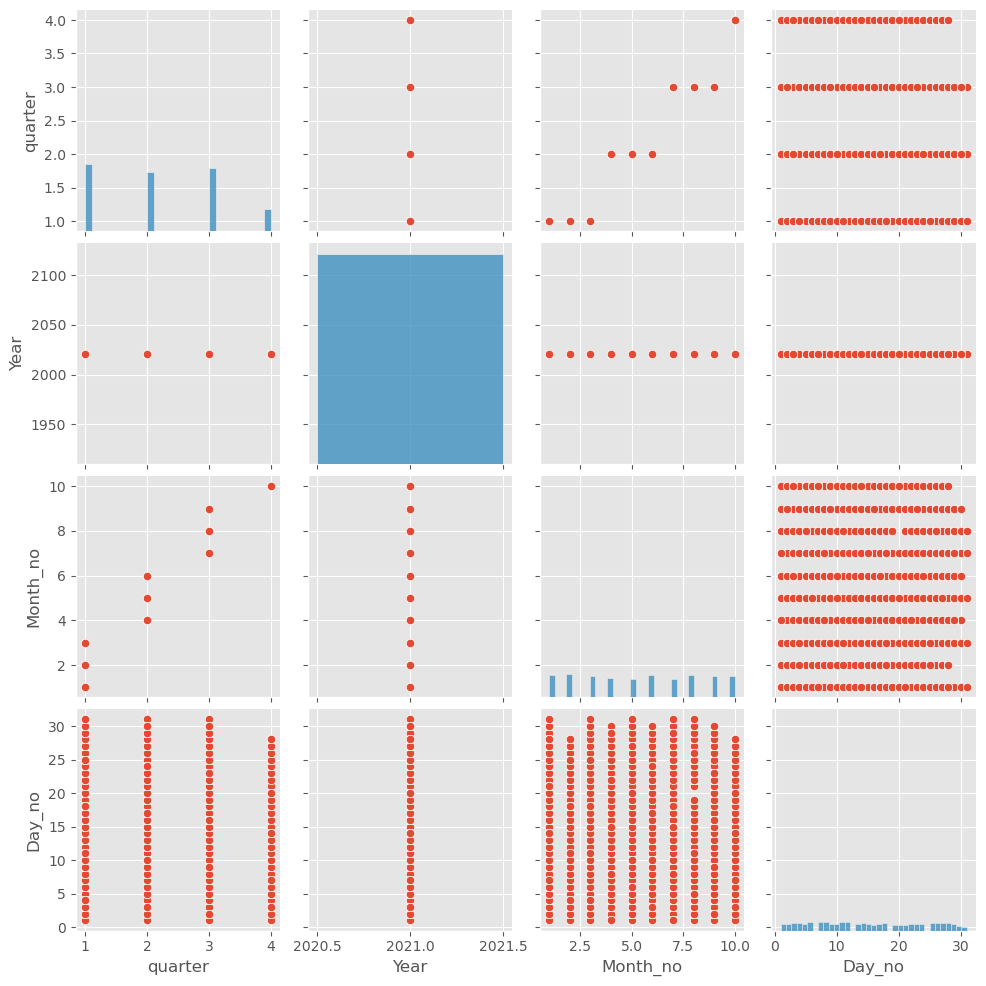

In [28]:
sns.pairplot(df)
plt.show()

In [29]:
df['Center'].value_counts()

Center    17285
North     13703
South      5083
West       3368
East       2839
Name: Center, dtype: int64

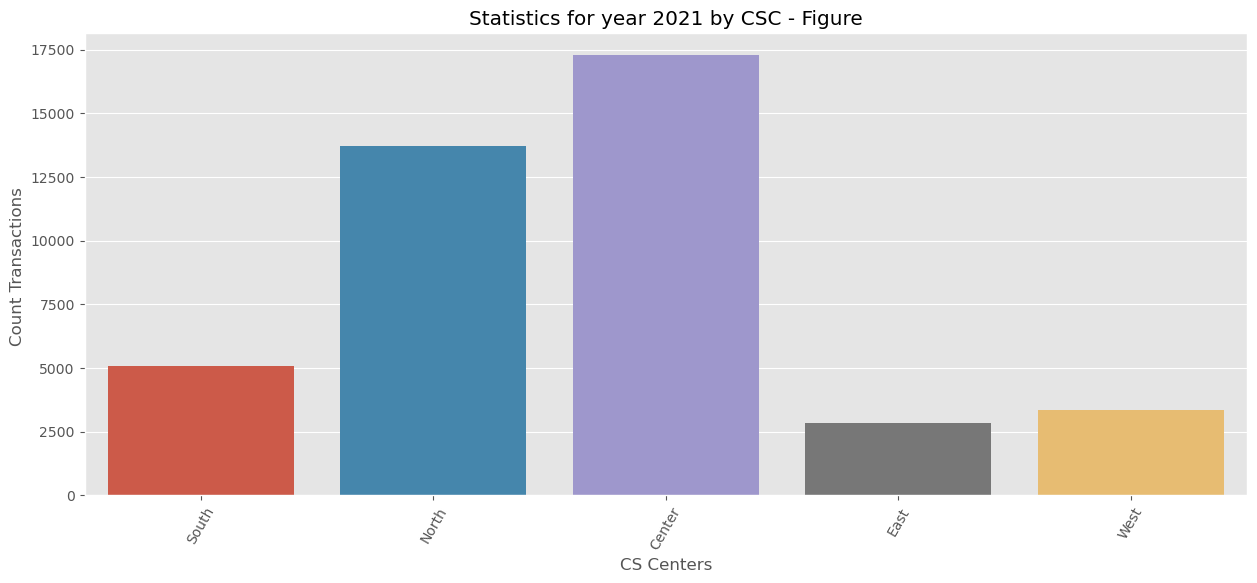

In [30]:
plt.figure(figsize=(15,6))
sns.countplot('Center', data=df)
plt.xticks(rotation=60)
plt.xlabel('CS Centers')
plt.ylabel('Count Transactions ')
plt.title('Statistics for year 2021 by CSC - Figure')
plt.show()

In [31]:
df['Month_name'].unique()
sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October']

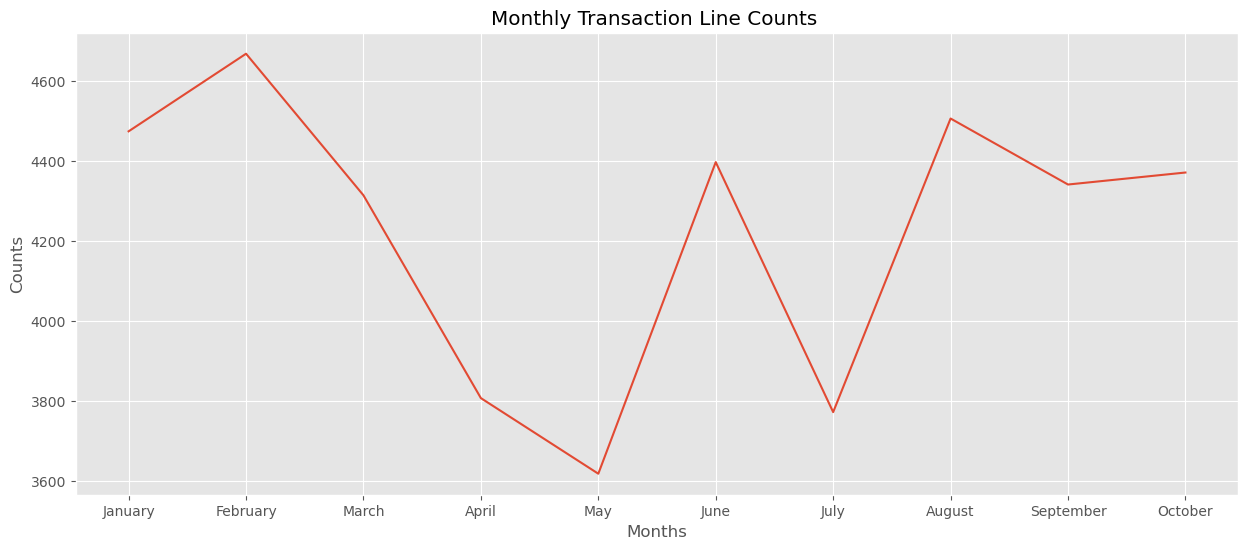

In [32]:
plt.figure(figsize=(15,6))
dfMonth = df['Month_name'].value_counts()
dfMonth.index = pd.CategoricalIndex(dfMonth.index, categories=sort_order,ordered=False)
dfMonth.sort_index()

sns.lineplot(x=dfMonth.index, y=dfMonth.values, data=dfMonth)

plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Monthly Transaction Line Counts ')
plt.show()

In [33]:
df['System'].unique()

array(['ELMS', 'Smarthub', 'iCase-counter', 'Tawtheeq-counter', 'Qsystem'],
      dtype=object)

In [34]:
df['System'].value_counts()

ELMS                27650
Smarthub             5324
Qsystem              3637
iCase-counter        3103
Tawtheeq-counter     2564
Name: System, dtype: int64

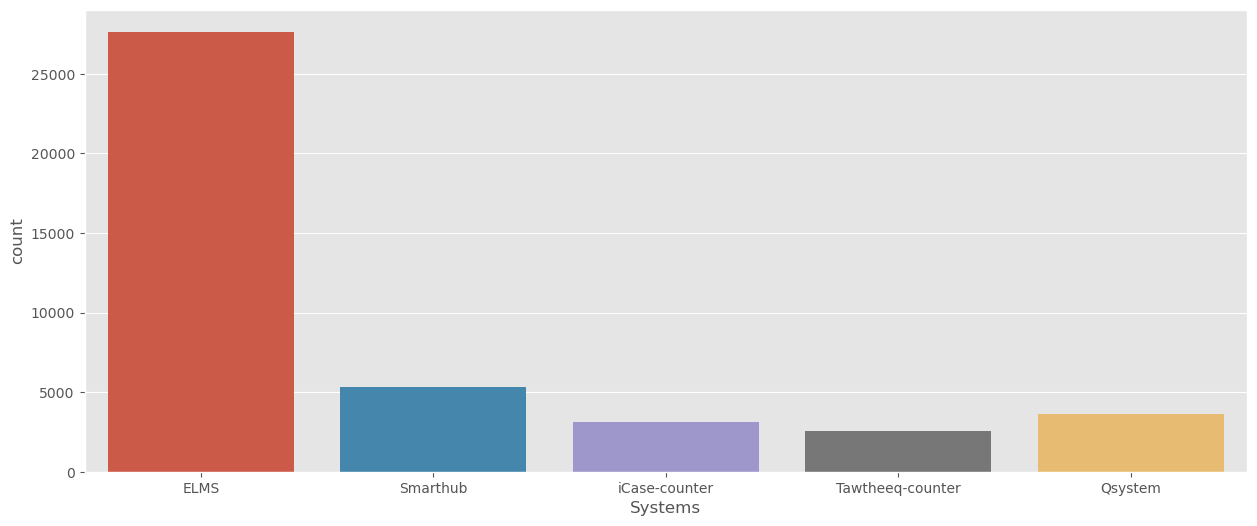

In [40]:
plt.figure(figsize=(15,6))
sns.countplot('System', data=df)
plt.xlabel('Systems')
plt.show()

In [41]:
df['Quarter_name'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

In [42]:
df['Quarter_name'].value_counts()

Q1    13459
Q3    12622
Q2    11825
Q4     4372
Name: Quarter_name, dtype: int64

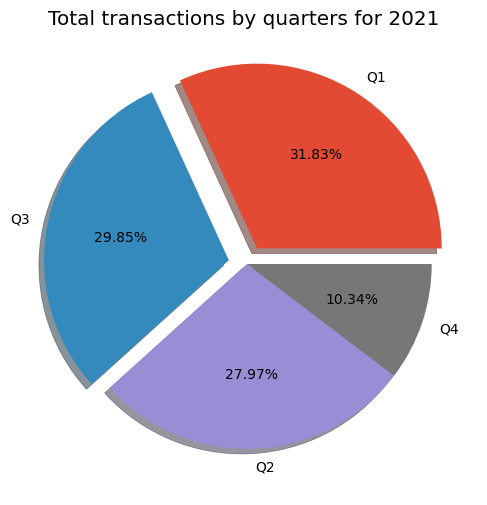

In [43]:
label_data = df['Quarter_name'].value_counts()
explode = (0.1,0.1,0,0)
plt.figure(figsize=(15,6))
plt.pie(label_data.values, labels= label_data.index,autopct='%.2f%%', shadow=True , explode=explode)  
plt.title('Total transactions by quarters for 2021 ')
plt.show()

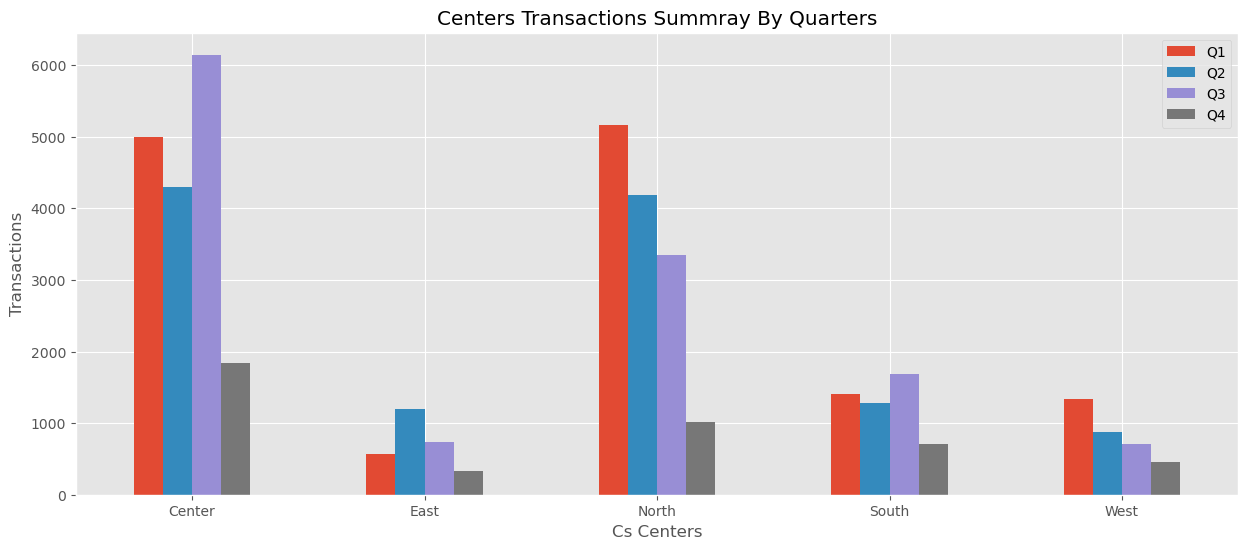

In [44]:
df_cen_q = pd.DataFrame(df[['Center','Quarter_name']].value_counts().reset_index())
df_cen_q.rename(columns= {0:'Trans_per_quarter'}, inplace=True)
df_cen_q.pivot(index='Center', columns='Quarter_name', values='Trans_per_quarter').plot(kind='bar', figsize=(15,6))
plt.xticks(rotation=0)
plt.xlabel('Cs Centers')
plt.ylabel('Transactions')
plt.title('Centers Transactions Summray By Quarters')
plt.legend(loc='upper right')
plt.show()

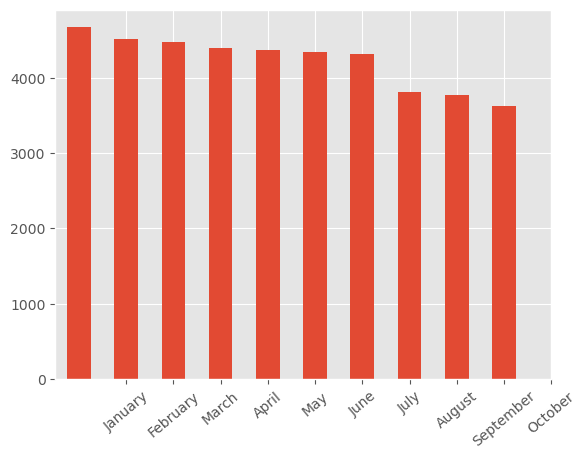

In [45]:
ax = df['Month_name']\
    .value_counts()\
    .plot(kind='bar')

m_no = df['Month_no'].unique()
m_name = df['Month_name'].unique()
 
plt.xticks(m_no,m_name, rotation=40)
plt.show()

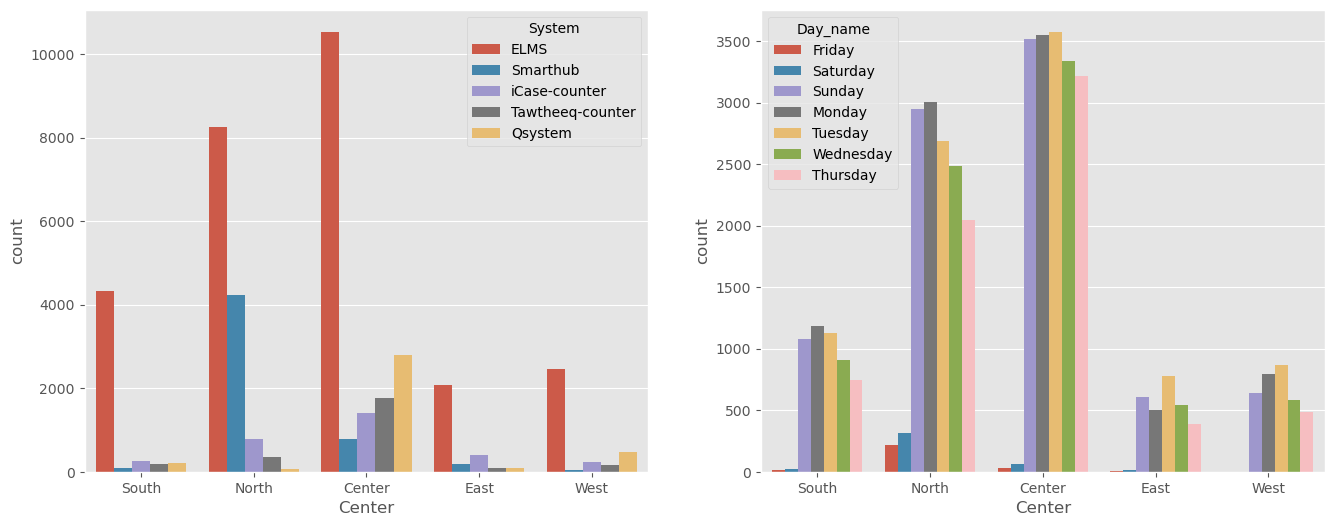

In [46]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot('Center', hue='System', data=df,)
plt.subplot(1,2,2)
sns.countplot('Center', hue='Day_name', data=df)
plt.show()

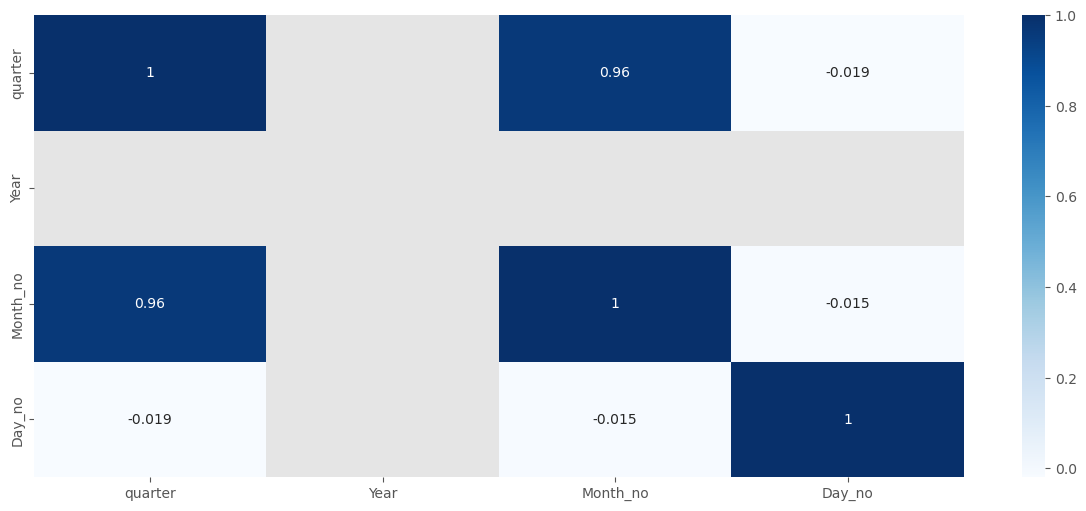

In [58]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()